In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.cloud import bigquery
from google.oauth2 import service_account

In [3]:
key_path = '../service_account/gentle-keyword-423715-j0-03be08ad6412.json'

credentials = service_account.Credentials.from_service_account_file(
    key_path,
    scopes=["https://www.googleapis.com/auth/bigquery"]
)

In [4]:
from google.cloud import bigquery

client = bigquery.Client(
    credentials = credentials,
    project=credentials.project_id
)

In [5]:
idx_prod = 1

In [6]:
# Try if this connected

query = """
SELECT *
FROM `bigquery-public-data.google_analytics_sample.ga_sessions_20160801`
LIMIT 5
"""

df = client.query(query).to_dataframe()
print(df.info())
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   visitorId             0 non-null      Int64 
 1   visitNumber           5 non-null      Int64 
 2   visitId               5 non-null      Int64 
 3   visitStartTime        5 non-null      Int64 
 4   date                  5 non-null      object
 5   totals                5 non-null      object
 6   trafficSource         5 non-null      object
 7   device                5 non-null      object
 8   geoNetwork            5 non-null      object
 9   customDimensions      5 non-null      object
 10  hits                  5 non-null      object
 11  fullVisitorId         5 non-null      object
 12  userId                0 non-null      object
 13  channelGrouping       5 non-null      object
 14  socialEngagementType  5 non-null      object
dtypes: Int64(4), object(11)
memory usage: 752.0+

,visitorId,visitNumber,visitId,visitStartTime,date,totals,trafficSource,device,geoNetwork,customDimensions,hits,fullVisitorId,userId,channelGrouping,socialEngagementType
0,<NA>,1,1470046245,1470046245,20160801,"{'visits': 1, 'hits': 24, 'pageviews': 17, 'ti...","{'referralPath': None, 'campaign': '(not set)'...","{'browser': 'Firefox', 'browserVersion': 'not ...","{'continent': 'Europe', 'subContinent': 'Weste...","[{'index': 4, 'value': 'EMEA'}]","[{'hitNumber': 1, 'time': 0, 'hour': 3, 'minut...",895954260133011192,None,Organic Search,Not Socially Engaged
1,<NA>,1,1470084717,1470084717,20160801,"{'visits': 1, 'hits': 24, 'pageviews': 18, 'ti...","{'referralPath': None, 'campaign': '(not set)'...","{'browser': 'Internet Explorer', 'browserVersi...","{'continent': 'Americas', 'subContinent': 'Nor...","[{'index': 4, 'value': 'North America'}]","[{'hitNumber': 1, 'time': 0, 'hour': 13, 'minu...",0288478011259077136,None,Direct,Not Socially Engaged
2,<NA>,3,1470078988,1470078988,20160801,"{'visits': 1, 'hits': 27, 'pageviews': 17, 'ti...","{'referralPath': None, 'campaign': '(not set)'...","{'browser': 'Safari', 'browserVersion': 'not a...","{'continent': 'Americas', 'subContinent': 'Nor...","[{'index': 4, 'value': 'North America'}]","[{'hitNumber': 1, 'time': 0, 'hour': 12, 'minu...",6440789996634275026,None,Organic Search,Not Socially Engaged
3,<NA>,4,1470075581,1470075581,20160801,"{'visits': 1, 'hits': 27, 'pageviews': 19, 'ti...","{'referralPath': '/', 'campaign': '(not set)',...","{'browser': 'Chrome', 'browserVersion': 'not a...","{'continent': 'Americas', 'subContinent': 'Nor...","[{'index': 4, 'value': 'North America'}]","[{'hitNumber': 1, 'time': 0, 'hour': 11, 'minu...",8520115029387302083,None,Referral,Not Socially Engaged
4,<NA>,30,1470099026,1470099026,20160801,"{'visits': 1, 'hits': 27, 'pageviews': 17, 'ti...","{'referralPath': None, 'campaign': '(not set)'...","{'browser': 'Chrome', 'browserVersion': 'not a...","{'continent': 'Americas', 'subContinent': 'Nor...","[{'index': 4, 'value': 'North America'}]","[{'hitNumber': 1, 'time': 0, 'hour': 17, 'minu...",6792260745822342947,None,Organic Search,Not Socially Engaged


In [7]:
# Create dataset reference
dataset_ref = client.dataset('google_analytics_sample', project='bigquery-public-data')
# Retrieve dataset from reference
dataset = client.get_dataset(dataset_ref)

In [8]:
# Get format schema nested field

def format_schema_field(schema_field, indent=0):
    indent_str = "  " * indent
    field_info = f"{indent_str}{schema_field.name} ({schema_field.field_type})"
    
    if schema_field.mode != "NULLABLE":
        field_info += f" - {schema_field.mode}"
    
    if schema_field.description:
        field_info += f" - {schema_field.description}"
    
    nested_indent = indent + 2
    if schema_field.field_type == "RECORD":
        for sub_field in schema_field.fields:
            field_info += "\n" + format_schema_field(sub_field, nested_indent)
    
    return field_info


table_ref = dataset_ref.table('ga_sessions_20160801')
table = client.get_table(table_ref)

# Display schemas
print("SCHEMA field for the 'totals' column:\n")
print(format_schema_field(table.schema[5]))
print()

print("\nSCHEMA field for the 'trafficSource' column:\n")
print(format_schema_field(table.schema[6]))
print()

print("\nSCHEMA field for the 'device' column:\n")
print(format_schema_field(table.schema[7]))
print()

print("\nSCHEMA field for the 'geoNetwork' column:\n")
print(format_schema_field(table.schema[8]))
print()

print("\nSCHEMA field for the 'customDimensions' column:\n")
print(format_schema_field(table.schema[9]))
print()

print("\nSCHEMA field for the 'hits' column:\n")
print(format_schema_field(table.schema[10]))

SCHEMA field for the 'totals' column:

totals (RECORD)
    visits (INTEGER)
    hits (INTEGER)
    pageviews (INTEGER)
    timeOnSite (INTEGER)
    bounces (INTEGER)
    transactions (INTEGER)
    transactionRevenue (INTEGER)
    newVisits (INTEGER)
    screenviews (INTEGER)
    uniqueScreenviews (INTEGER)
    timeOnScreen (INTEGER)
    totalTransactionRevenue (INTEGER)
    sessionQualityDim (INTEGER)


SCHEMA field for the 'trafficSource' column:

trafficSource (RECORD)
    referralPath (STRING)
    campaign (STRING)
    source (STRING)
    medium (STRING)
    keyword (STRING)
    adContent (STRING)
    adwordsClickInfo (RECORD)
        campaignId (INTEGER)
        adGroupId (INTEGER)
        creativeId (INTEGER)
        criteriaId (INTEGER)
        page (INTEGER)
        slot (STRING)
        criteriaParameters (STRING)
        gclId (STRING)
        customerId (INTEGER)
        adNetworkType (STRING)
        targetingCriteria (RECORD)
            boomUserlistId (INTEGER)
        isV

In [9]:
anomaly = pd.read_csv("../result/anomaly_products(1).csv")['product'].values
tuple(anomaly)

('Google Sunglasses',
 "Google Men's Vintage Badge Tee Black",
 "Google Men's 100% Cotton Short Sleeve Hero Tee White",
 'Google 22 oz Water Bottle',
 'Google Laptop and Cell Phone Stickers',
 'Red Shine 15 oz Mug',
 'Recycled Paper Journal Set',
 "Google Men's 100% Cotton Short Sleeve Hero Tee Black",
 'Google Twill Cap',
 "Google Men's 100% Cotton Short Sleeve Hero Tee Navy",
 "Google Men's  Zip Hoodie",
 '26 oz Double Wall Insulated Bottle',
 'YouTube Twill Cap',
 'Foam Can and Bottle Cooler',
 'Google Kick Ball',
 'Google Canvas Tote Natural/Navy',
 'Recycled Mouse Pad',
 'Sport Bag',
 'Windup Android',
 'Leatherette Journal')

In [10]:
tuple(anomaly)[idx_prod]

"Google Men's Vintage Badge Tee Black"

In [11]:
query = f"""
SELECT 
  products.v2ProductName as product,
  date,
  SUM(totals.transactions) as total_transactions
FROM `bigquery-public-data.google_analytics_sample.ga_sessions_*` h,
    UNNEST(h.hits) hits,
    UNNEST(hits.product) products
WHERE 
  (_TABLE_SUFFIX BETWEEN '20160801' AND '20170801')
  AND
    (
      hits.eCommerceAction.action_type != '0'
      AND
      hits.eCommerceAction.action_type != '3'
      AND
      hits.eCommerceAction.action_type != '4'
    )
  AND
  (geoNetwork.country = 'United States')
  AND
  products.v2ProductName = "{tuple(anomaly)[idx_prod]}"
GROUP BY product, date
ORDER BY date 
"""

df = client.query(query).to_dataframe()
print(df.info())
df.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   product             310 non-null    object
 1   date                310 non-null    object
 2   total_transactions  194 non-null    Int64 
dtypes: Int64(1), object(2)
memory usage: 7.7+ KB
None


,product,date,total_transactions
0,Google Men's Vintage Badge Tee Black,20160801,<NA>
1,Google Men's Vintage Badge Tee Black,20160802,12
2,Google Men's Vintage Badge Tee Black,20160803,<NA>
3,Google Men's Vintage Badge Tee Black,20160804,2
4,Google Men's Vintage Badge Tee Black,20160805,<NA>
5,Google Men's Vintage Badge Tee Black,20160806,9
6,Google Men's Vintage Badge Tee Black,20160807,<NA>
7,Google Men's Vintage Badge Tee Black,20160808,20
8,Google Men's Vintage Badge Tee Black,20160809,<NA>
9,Google Men's Vintage Badge Tee Black,20160810,<NA>


In [12]:
df = df.fillna(0)
df['date'] = pd.to_datetime(df['date'])
df['total_transactions'] = df['total_transactions'].astype('float')
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   product             310 non-null    object        
 1   date                310 non-null    datetime64[ns]
 2   total_transactions  310 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 7.4+ KB
None


,product,date,total_transactions
0,Google Men's Vintage Badge Tee Black,2016-08-01,0.0
1,Google Men's Vintage Badge Tee Black,2016-08-02,12.0
2,Google Men's Vintage Badge Tee Black,2016-08-03,0.0
3,Google Men's Vintage Badge Tee Black,2016-08-04,2.0
4,Google Men's Vintage Badge Tee Black,2016-08-05,0.0


In [13]:
series = df.set_index('date')['total_transactions']
series

date
2016-08-01     0.0
2016-08-02    12.0
2016-08-03     0.0
2016-08-04     2.0
2016-08-05     0.0
              ... 
2017-07-28    39.0
2017-07-29    17.0
2017-07-30    18.0
2017-07-31    48.0
2017-08-01    11.0
Name: total_transactions, Length: 310, dtype: float64

In [14]:
# split dataset
train, test = series[series.index < pd.to_datetime('2017-04-01')], series[series.index > pd.to_datetime('2017-04-01')]
print('Number of dataset:{}'.format(len(train)))
print('Number of test: {}'.format(len(test)))

Number of dataset:189
Number of test: 120


In [15]:
# train, validation = dataset.iloc[:int(0.7 * len(train))], dataset.iloc[int(0.7 * len(dataset)):]
# print('Number of train:{}'.format(len(train)))
# print('Number of validation: {}'.format(len(validation)))

In [16]:
# EDA
train.describe()

count     189.000000
mean       11.746032
std        90.838406
min         0.000000
25%         0.000000
50%         2.000000
75%         8.000000
max      1250.000000
Name: total_transactions, dtype: float64

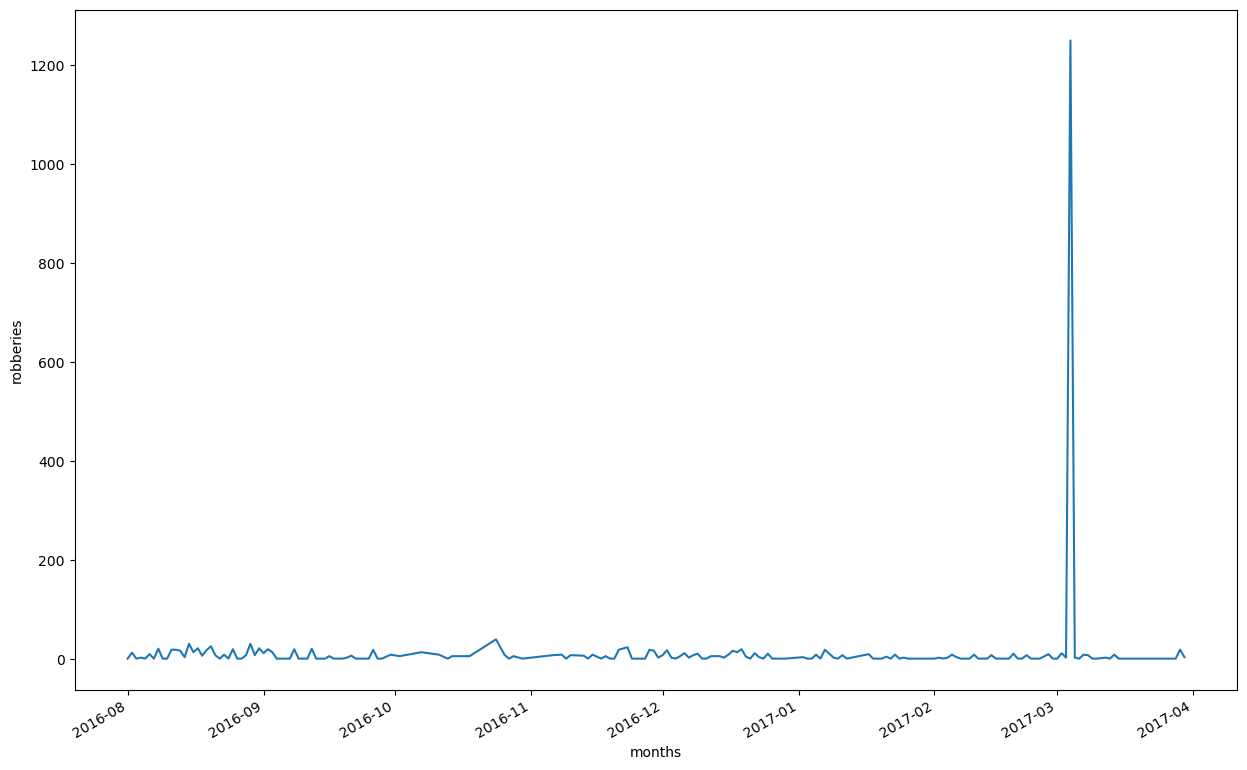

In [17]:
# Data Analysis (line plot)
plt.figure(figsize=(15,10))
train.plot()
plt.ylabel('robberies')
plt.xlabel('months')
plt.show()

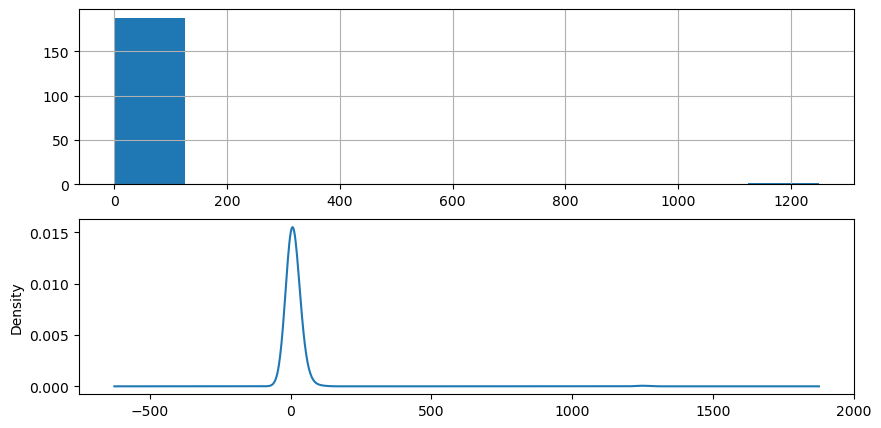

In [18]:
#density plot
plt.figure(figsize=(10,5))
plt.subplot(211)
train.hist()
plt.subplot(212)
series.plot(kind='kde')
plt.show()

In [19]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

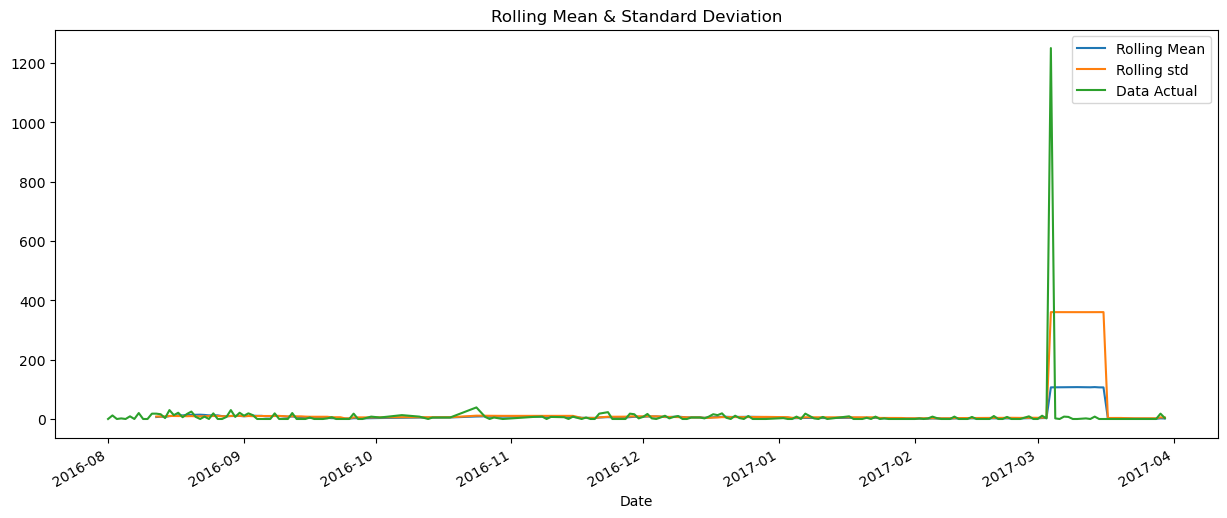

####################################################################################################
ADF Statistic: -13.769730
p-value: 0.000000
Critical Values:
	1%: -3.466
	5%: -2.877
	10%: -2.575
ADF < Critival Values
Reject null hypothesis, time series is stationary


In [20]:
def adfuller_test(y):
    # Plotting rolling statistics
    fig, ax = plt.subplots(figsize=(15, 6))
    y.rolling(12).mean().plot(ax=ax, label='Rolling Mean')
    y.rolling(12).std().plot(ax=ax, label='Rolling std')
    y.plot(ax=ax, label='Data Actual')
    plt.xlabel('Date')
    plt.title('Rolling Mean & Standard Deviation')
    plt.legend()
    plt.show();
    
    print('#'*100)
    # Aduller test
    result = adfuller(y)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
    if result[0] > result[4]['5%']:
        print('ADF > Critical Values')
        print('Failed to reject null hypothesis, time series is non-stationary')
    else:
        print('ADF < Critival Values')
        print('Reject null hypothesis, time series is stationary')

adfuller_test(train)

In [21]:
import time
from sklearn.metrics import mean_absolute_error

p_params = range(0, 25, 8)
q_params = range(0, 3)

mae_grid = dict()
for p in p_params:
    mae_grid[p] = list()
    for q in q_params:
        order = (p, 0, q)
        start_time = time.time()
        model = ARIMA(train, order=order).fit()
        elapsed_time = round(time.time() - start_time, 2)
        print(f"Trained ARIMA {order} in {elapsed_time} seconds.")
        y_pred = model.predict()
        mae = mean_absolute_error(train.iloc[24:], y_pred.iloc[24:])
        mae_grid[p].append(mae)

print()
print(mae_grid)

Trained ARIMA (0, 0, 0) in 0.1 seconds.


C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.


Trained ARIMA (0, 0, 1) in 0.07 seconds.
Trained ARIMA (0, 0, 2) in 0.11 seconds.


C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Trained ARIMA (8, 0, 0) in 0.35 seconds.


C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Trained ARIMA (8, 0, 1) in 0.36 seconds.


C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed t

Trained ARIMA (8, 0, 2) in 1.18 seconds.
Trained ARIMA (16, 0, 0) in 1.17 seconds.


C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed t

Trained ARIMA (16, 0, 1) in 3.04 seconds.


C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, fr

Trained ARIMA (16, 0, 2) in 3.41 seconds.
Trained ARIMA (24, 0, 0) in 4.97 seconds.


C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starti

Trained ARIMA (24, 0, 1) in 5.44 seconds.


C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starti

Trained ARIMA (24, 0, 2) in 5.74 seconds.

{0: [16.507643108694754, 16.51802951617231, 16.510438858266642], 8: [16.645743826761695, 16.646021316282138, 20.340189501181435], 16: [16.751167665024013, 20.26093850328685, 20.116964139927138], 24: [16.97144706116491, 16.96959859843272, 17.002256868707246]}


In [22]:
mae_df = pd.DataFrame(mae_grid)
mae_df.round(4)

,0,8,16,24
0,16.5076,16.6457,16.7512,16.9714
1,16.5180,16.6460,20.2609,16.9696
2,16.5104,20.3402,20.1170,17.0023


In [38]:
idx_min = mae_df.idxmin()
min_value = mae_df.min().min()
for c, r in zip(idx_min.index, idx_min.values):
    if mae_df.loc[r, c] == min_value:
        print(c, r)
        p_opt = c
        q_opt = r
if p_opt == 0:
    p_opt = 8
if q_opt == 0:
    q_opt = 1

0 0


In [39]:
model = ARIMA(train, order=(p_opt, 0, q_opt)).fit()
print(model.summary())

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



                               SARIMAX Results                                
Dep. Variable:     total_transactions   No. Observations:                  189
Model:                 ARIMA(8, 0, 1)   Log Likelihood               -1119.824
Date:                Wed, 22 May 2024   AIC                           2261.649
Time:                        22:26:50   BIC                           2297.308
Sample:                             0   HQIC                          2276.095
                                - 189                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.7628     76.538      0.154      0.878    -138.250     161.775
ar.L1          0.0704    132.599      0.001      1.000    -259.819     259.959
ar.L2         -0.0039      1.670     -0.002      0.9

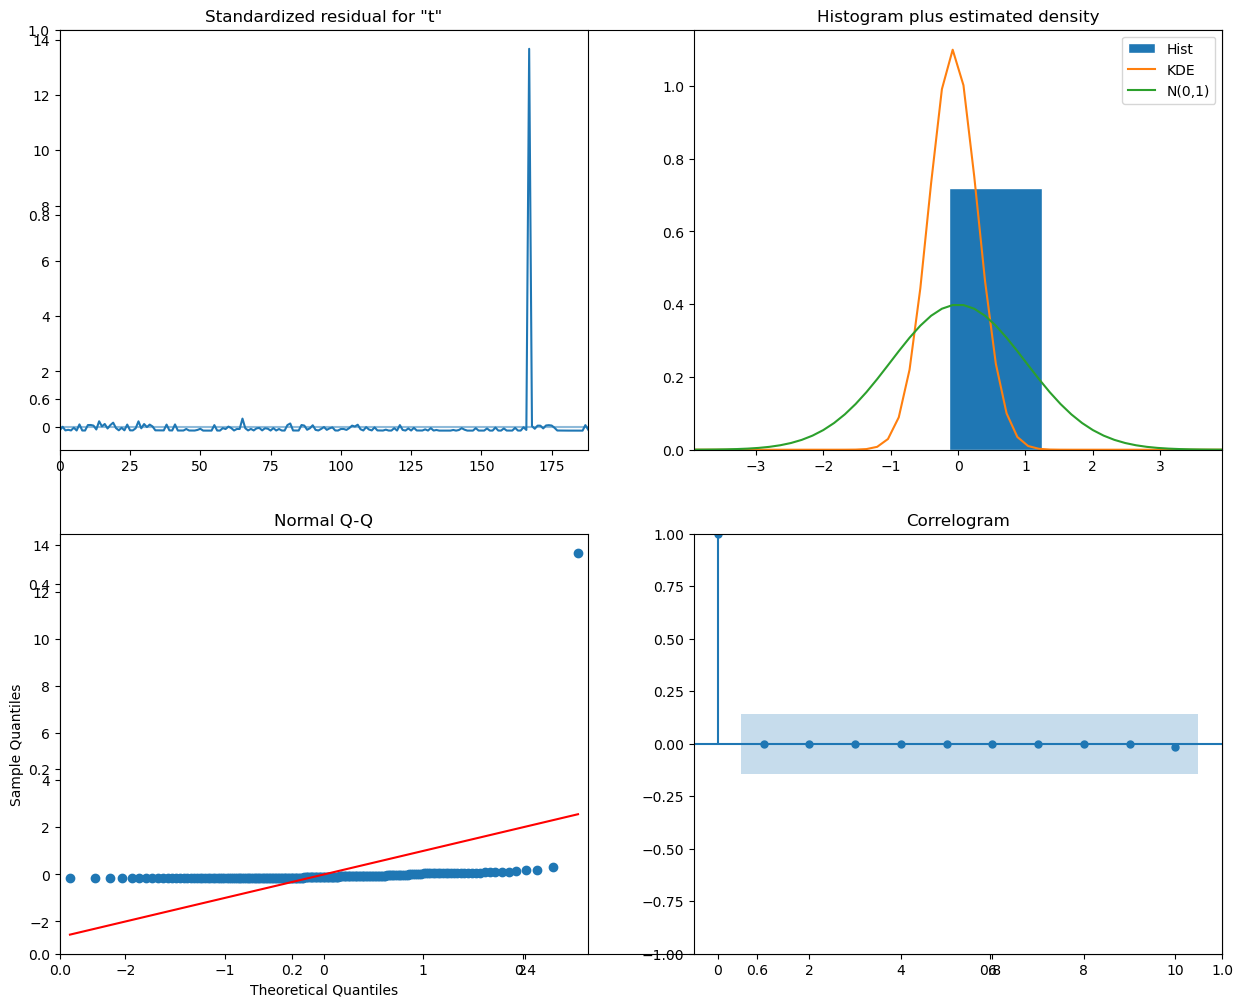

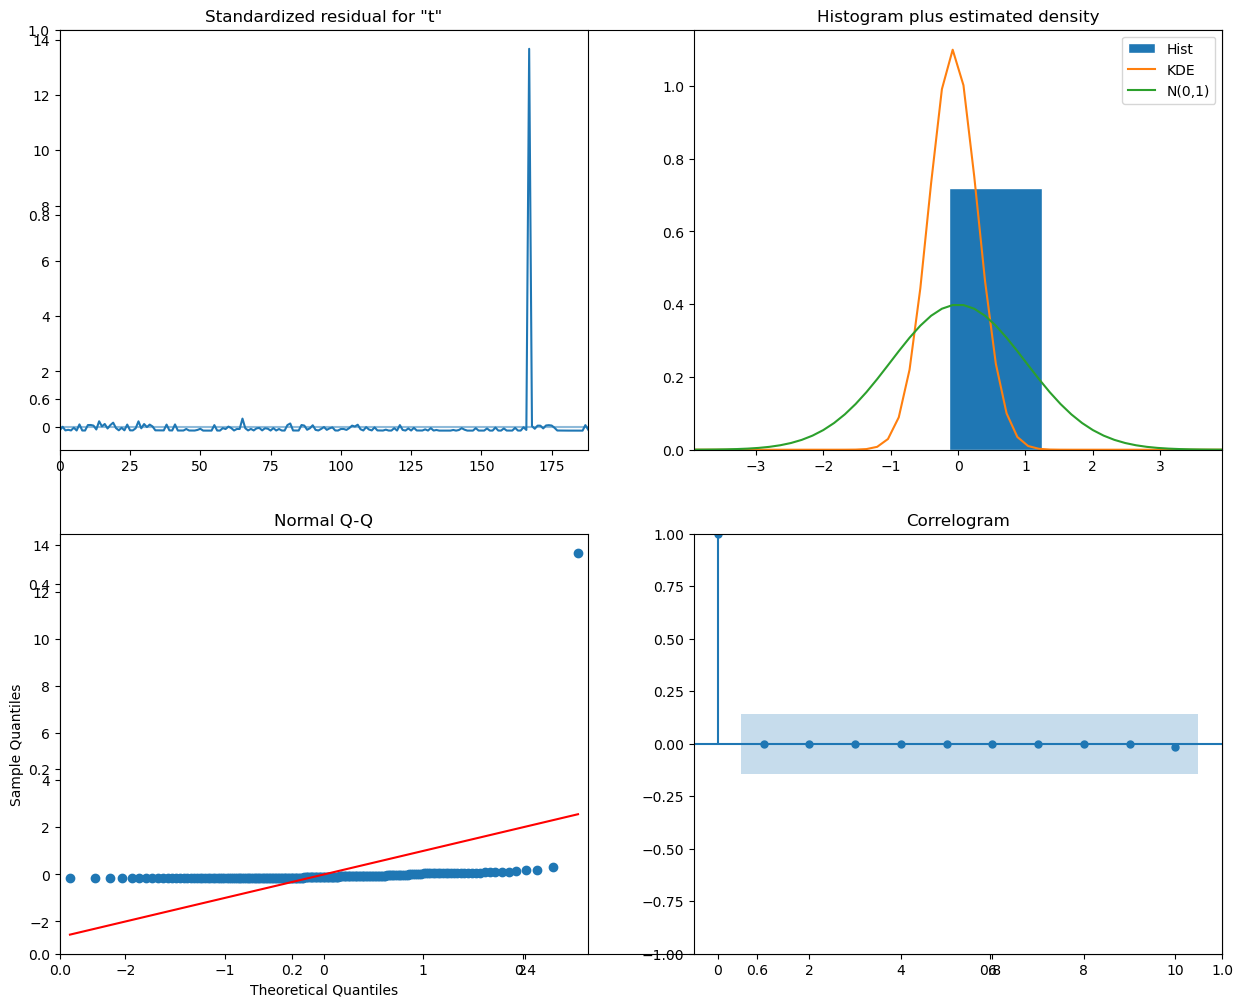

In [40]:
fig, ax = plt.subplots(figsize=(15, 12))
model.plot_diagnostics(fig=fig)

In [41]:
y_pred_wfv = pd.Series()
history = train.copy()
for i in range(len(test)):
    model = ARIMA(history, order=(p_opt, 0, q_opt)).fit()
    next_pred = model.forecast()
    next_period = test.index[i]
    pred_data = pd.Series(next_pred.iloc[0], index=[next_period])
    y_pred_wfv = pd.concat([y_pred_wfv, pred_data])
    tested_data = pd.Series([test[next_period]], index=[next_period])
    history = pd.concat([history, tested_data])

C:\Users\Baha Tegar\AppData\Local\Temp\ipykernel_34652\3215420438.py:1: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: 

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: 

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: 

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: 

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: 

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: 

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: 

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: 

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: 

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: 

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: 

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: 

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: 

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: 

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: 

In [42]:
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

df_pred_test = pd.DataFrame({'y_test': test, 'y_pred_wfv': y_pred_wfv})
fig = px.line(df_pred_test, labels={'value': 'Total Visits'})
fig.show()

In [28]:
print(mean_absolute_error(test.resample('M').mean(), y_pred_wfv.resample('M').mean()))
df_pred_test

6.985243492340712


,y_test,y_pred_wfv
2017-04-02,0.0,11.746025
2017-04-03,0.0,11.684181
2017-04-04,0.0,11.623032
2017-04-05,7.0,11.562520
2017-04-07,0.0,11.538858
...,...,...
2017-07-28,39.0,13.861838
2017-07-29,17.0,13.944379
2017-07-30,18.0,13.954244
2017-07-31,48.0,13.967423


In [29]:
df_pred_test.resample('W').mean()

,y_test,y_pred_wfv
2017-04-02,0.000000,11.746025
2017-04-09,1.400000,11.577603
2017-04-16,9.000000,11.419794
2017-04-23,4.857143,11.275837
2017-04-30,7.142857,11.094795
2017-05-07,18.714286,11.066391
2017-05-14,16.857143,11.429403
2017-05-21,27.714286,11.684381
2017-05-28,16.571429,12.011585
2017-06-04,28.142857,12.362460


In [30]:
# Baseline
y_mean = test.mean()
y_baseline = y_mean + test * 0
print('y_mean ', y_mean)
print(mean_absolute_error(test.resample('M').mean(), y_baseline.resample('M').mean()))

y_mean  17.725
6.486839904420551


In [31]:
pd.DataFrame({'actual': series, 'y_pred_wfv': y_pred_wfv}).tail()

,actual,y_pred_wfv
2017-07-28,39.0,13.861838
2017-07-29,17.0,13.944379
2017-07-30,18.0,13.954244
2017-07-31,48.0,13.967423
2017-08-01,11.0,14.077918


In [32]:
result = pd.DataFrame({'actual': series, 'y_pred_wfv': y_pred_wfv})
result

,actual,y_pred_wfv
2016-08-01,0.0,NaN
2016-08-02,12.0,NaN
2016-08-03,0.0,NaN
2016-08-04,2.0,NaN
2016-08-05,0.0,NaN
...,...,...
2017-07-28,39.0,13.861838
2017-07-29,17.0,13.944379
2017-07-30,18.0,13.954244
2017-07-31,48.0,13.967423


In [33]:
result = result.reset_index(names=['date'])
result['product'] = tuple(anomaly)[idx_prod] * result.shape[0]
result.to_csv(f'../result/transaction-regression-{tuple(anomaly)[idx_prod]}.csv', index=False)